In [66]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [67]:
df = pd.read_csv("newly_truncated_value2.csv")

df.head()

,0,1,2,3,4,5,6,7
0,0.0,0.5,2.179346e-30,9.554672e-30,0.0,0.99997,0.99993,1.00000
1,0.0,0.0,9.554672e-30,9.200899e-30,1.0,0.99993,0.99997,1.00000
2,0.0,0.0,7.981269e-30,9.554672e-30,0.0,0.99994,0.99993,1.00000
3,0.0,0.0,9.554672e-30,9.200899e-30,1.0,0.99993,0.99997,1.00000
4,0.0,0.0,5.671957e-30,9.554672e-30,0.0,0.99993,0.99993,0.99999


In [68]:
X = np.array(df.drop(['5','6','7'],1))
y = np.array(df['7'])
y = y.astype("int")
class_names=df['7'].unique()

In [69]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [71]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

            

In [72]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
              
        

Confusion matrix, without normalization
[[367   0]
 [358   0]]


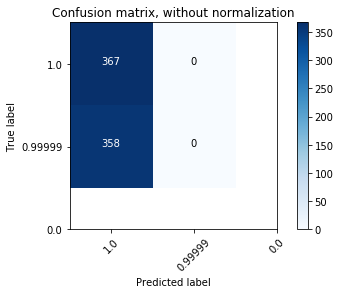

In [73]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


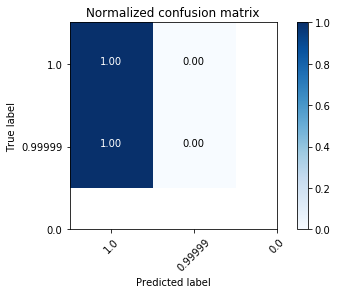

In [62]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [63]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,367,367
1,358,358
All,725,725


In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.51      1.00      0.67       367
          1       0.00      0.00      0.00       358

avg / total       0.26      0.51      0.34       725



/home/seema/major/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
